In [3]:
import cv2 
import ast
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
from os import listdir
import pandas as pd
from scipy import interpolate
from scipy import ndimage
from tools import Tools

# Plot trajectories

In [2]:
data = np.load("/Users/ninawiedemann/Desktop/UNI/Praktikum/numpy arrays/interpolated.npy")
labels = np.load("/Users/ninawiedemann/Desktop/UNI/Praktikum/numpy arrays/interpolated_labels.npy")

In [25]:
def normalize(data):
    """
    normalizes across frames - axix to zero mean and standard deviation
    """
    M,N, nr_joints,_ = data.shape
    means = np.array([np.mean(ex) for ex in data])
    std = np.array([np.std(ex) for ex in data])
    data_new = [(data[i]-means[i])/(std[i]+0.000001) for i in range(len(data))]
    return np.array(data_new)

(6422,)
(6422,)
[ -1.70189877e-16  -1.13459918e-16   4.53839672e-16 ...,   9.92774282e-17
   6.80759507e-16   3.40379754e-16]


In [16]:
unique = np.unique(new_labels)
index_liste = []
for pitches in unique:
    index_liste.append(np.where(new_labels==pitches))

JOINT:  0


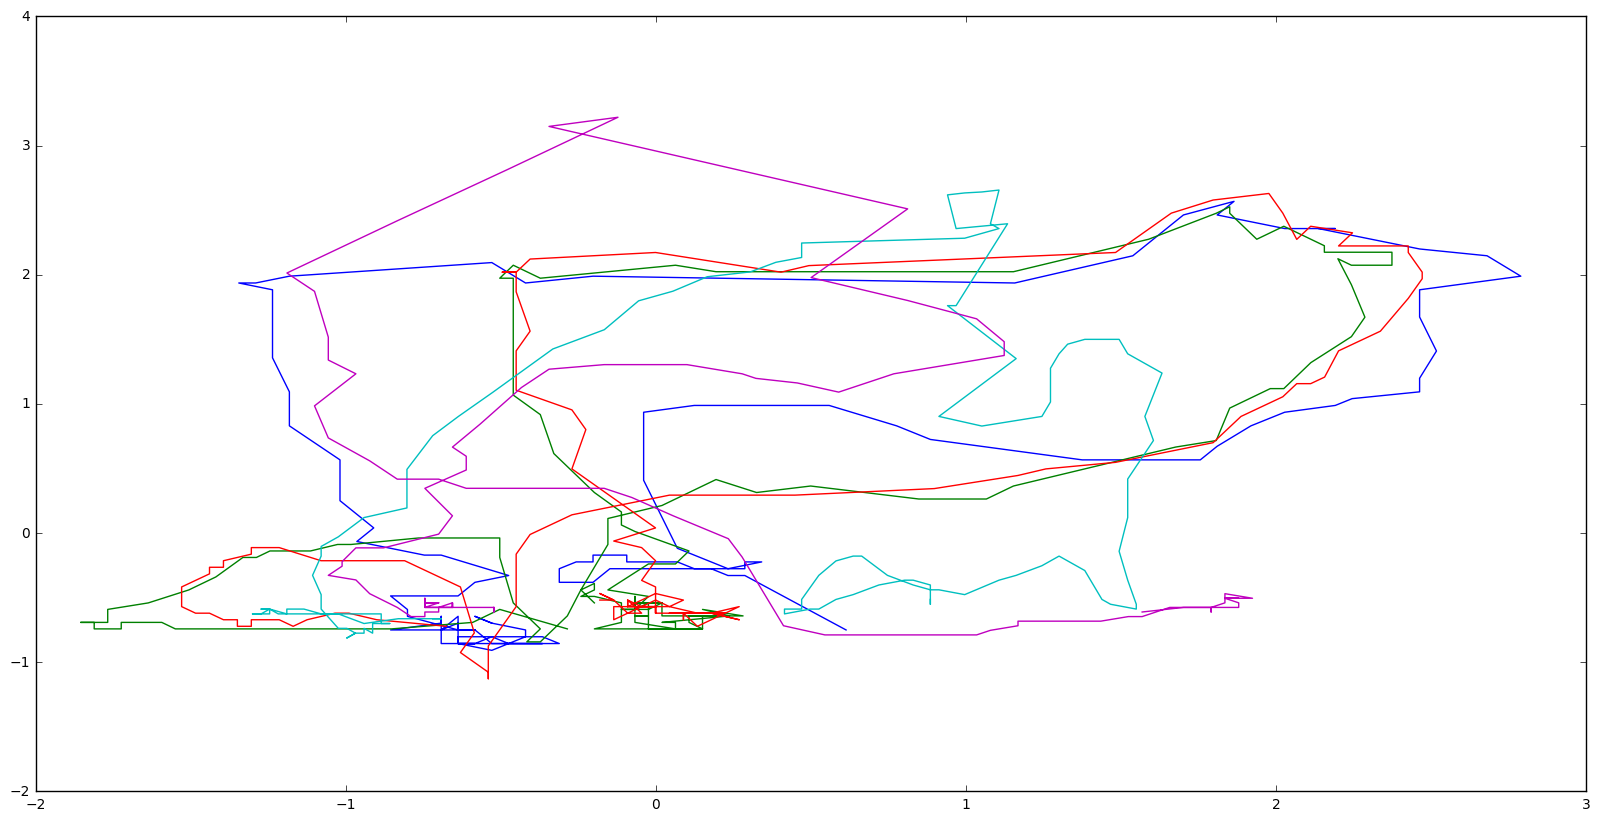

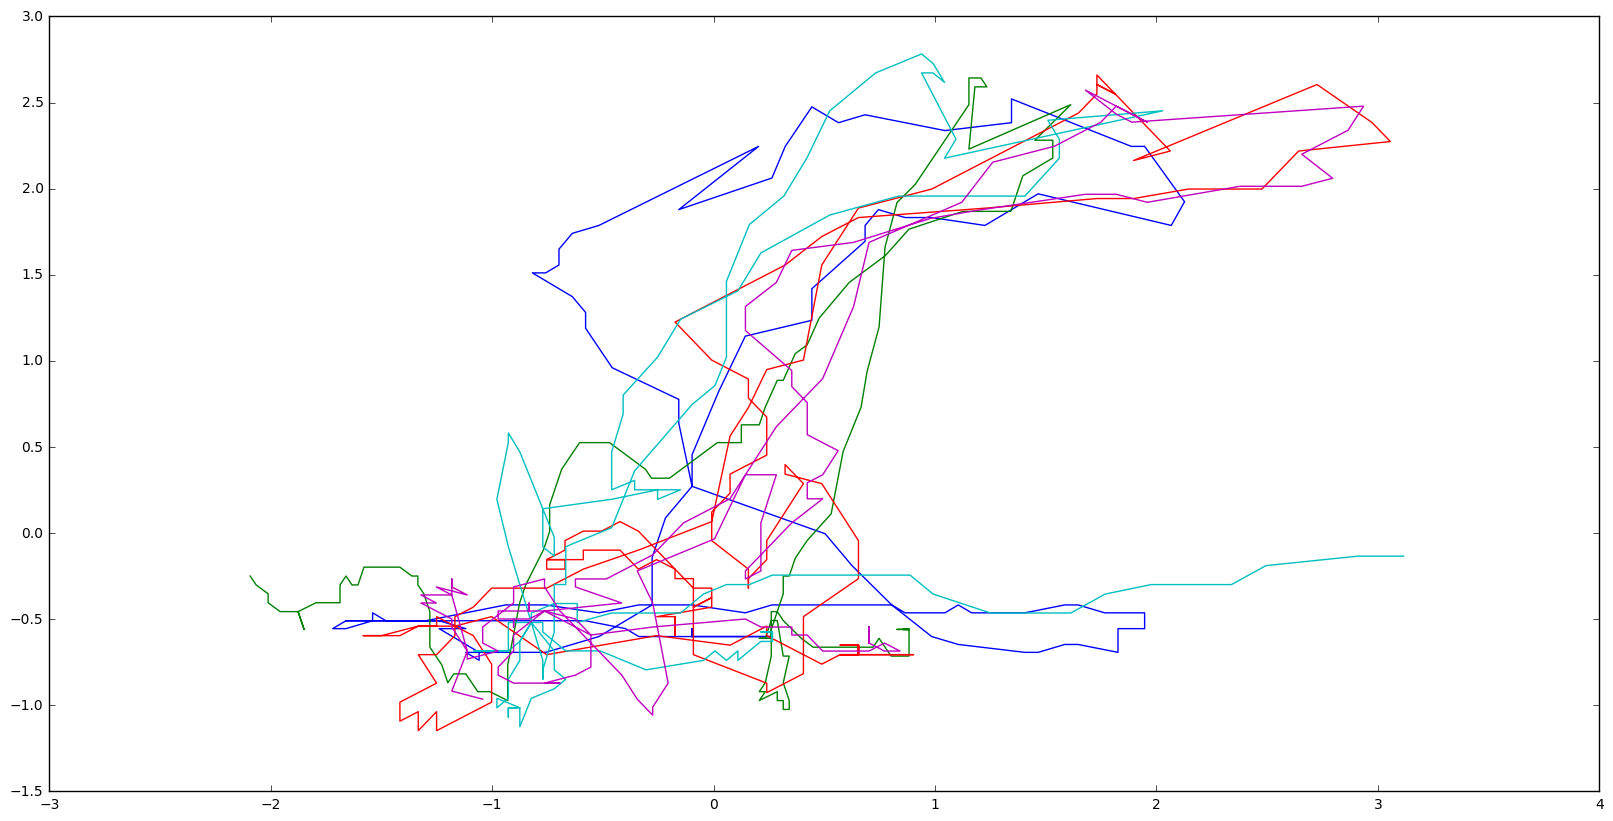

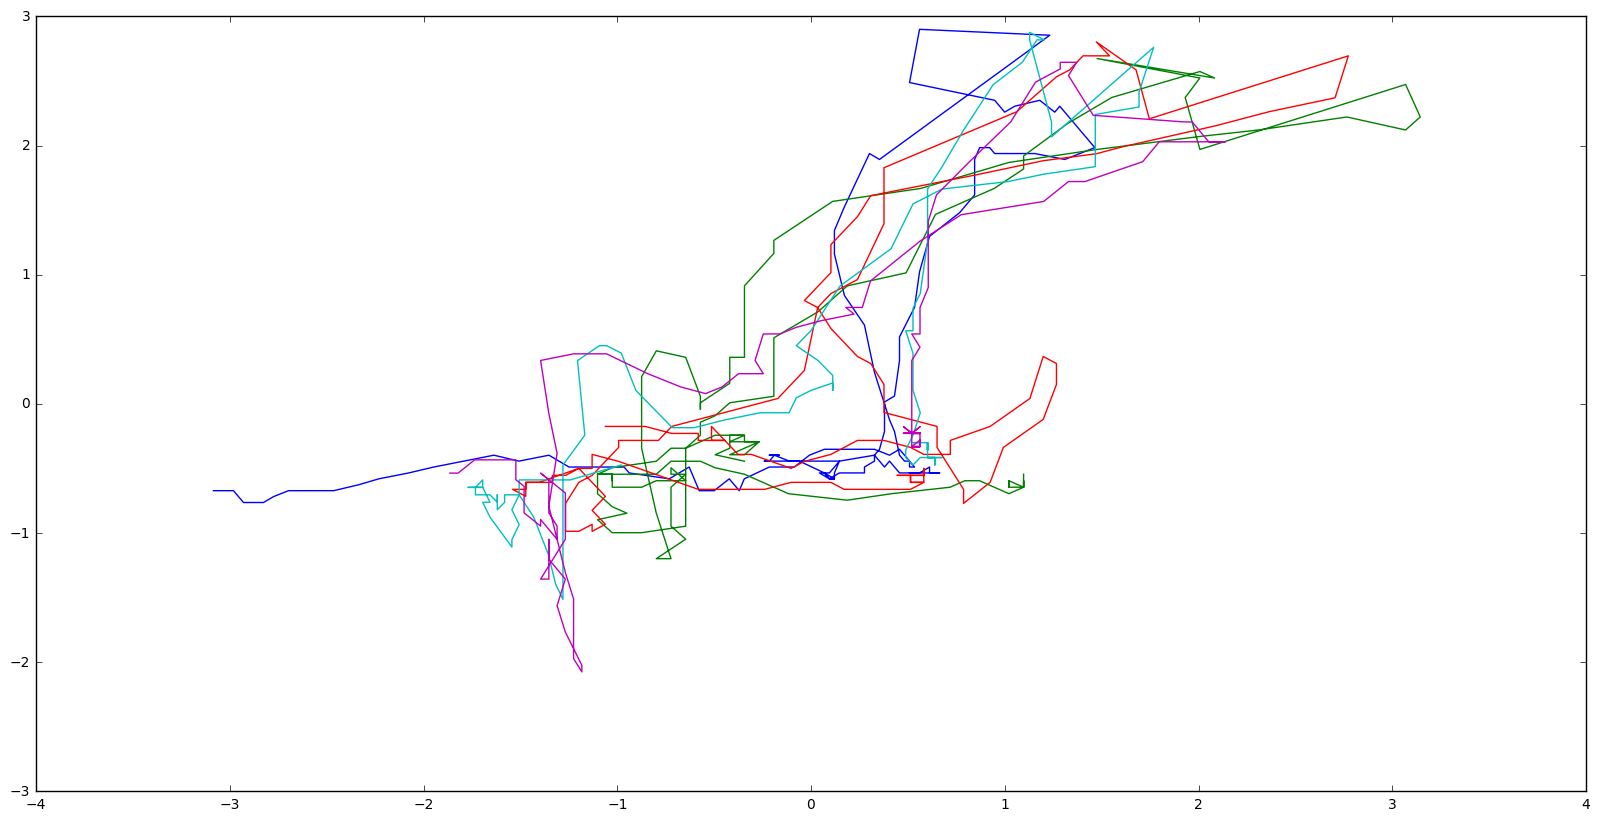

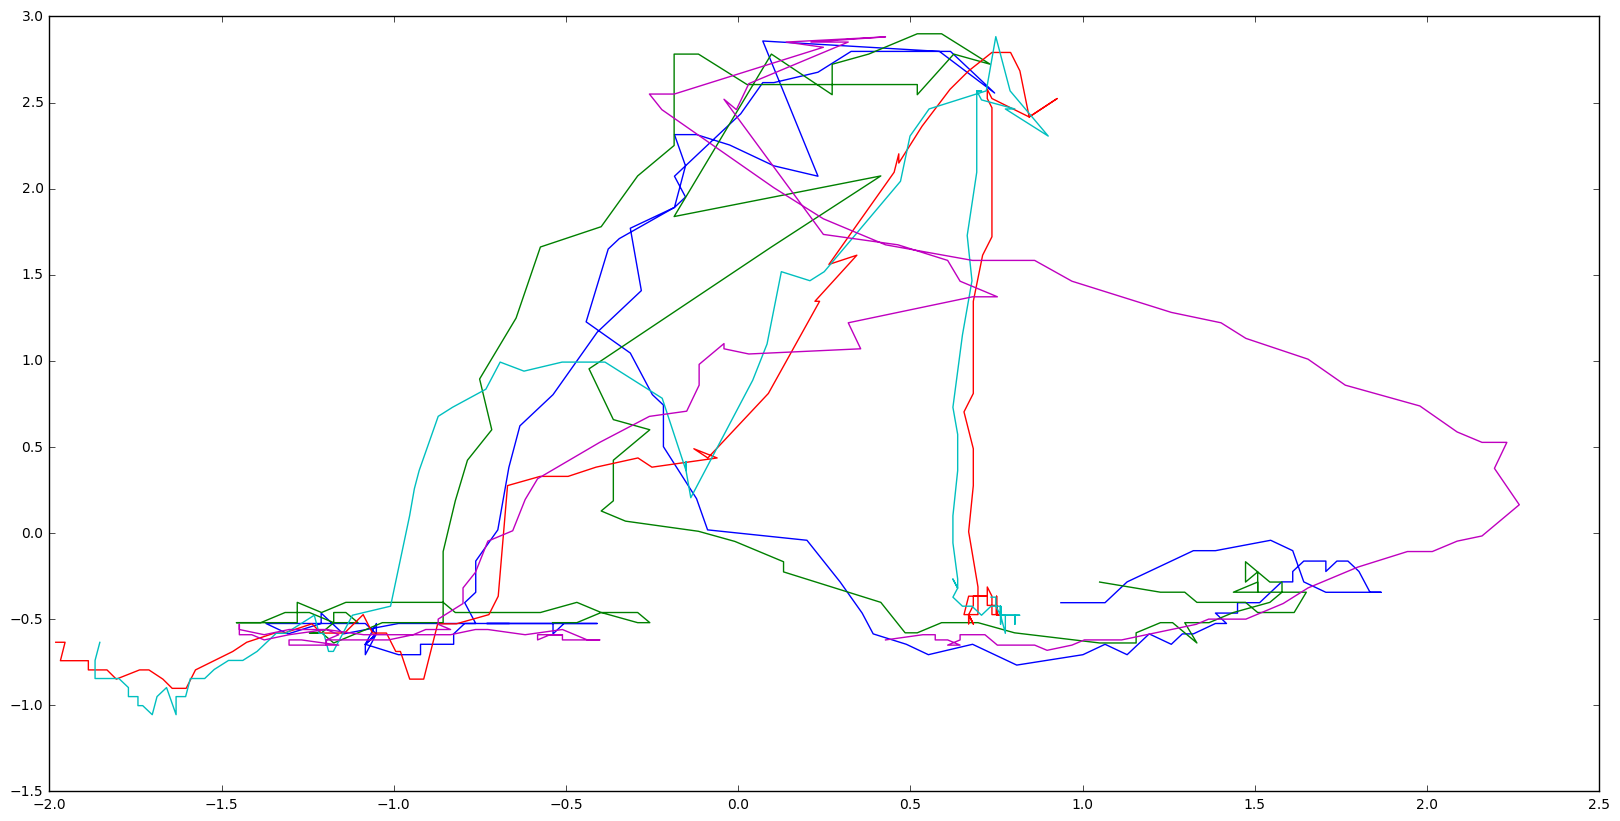

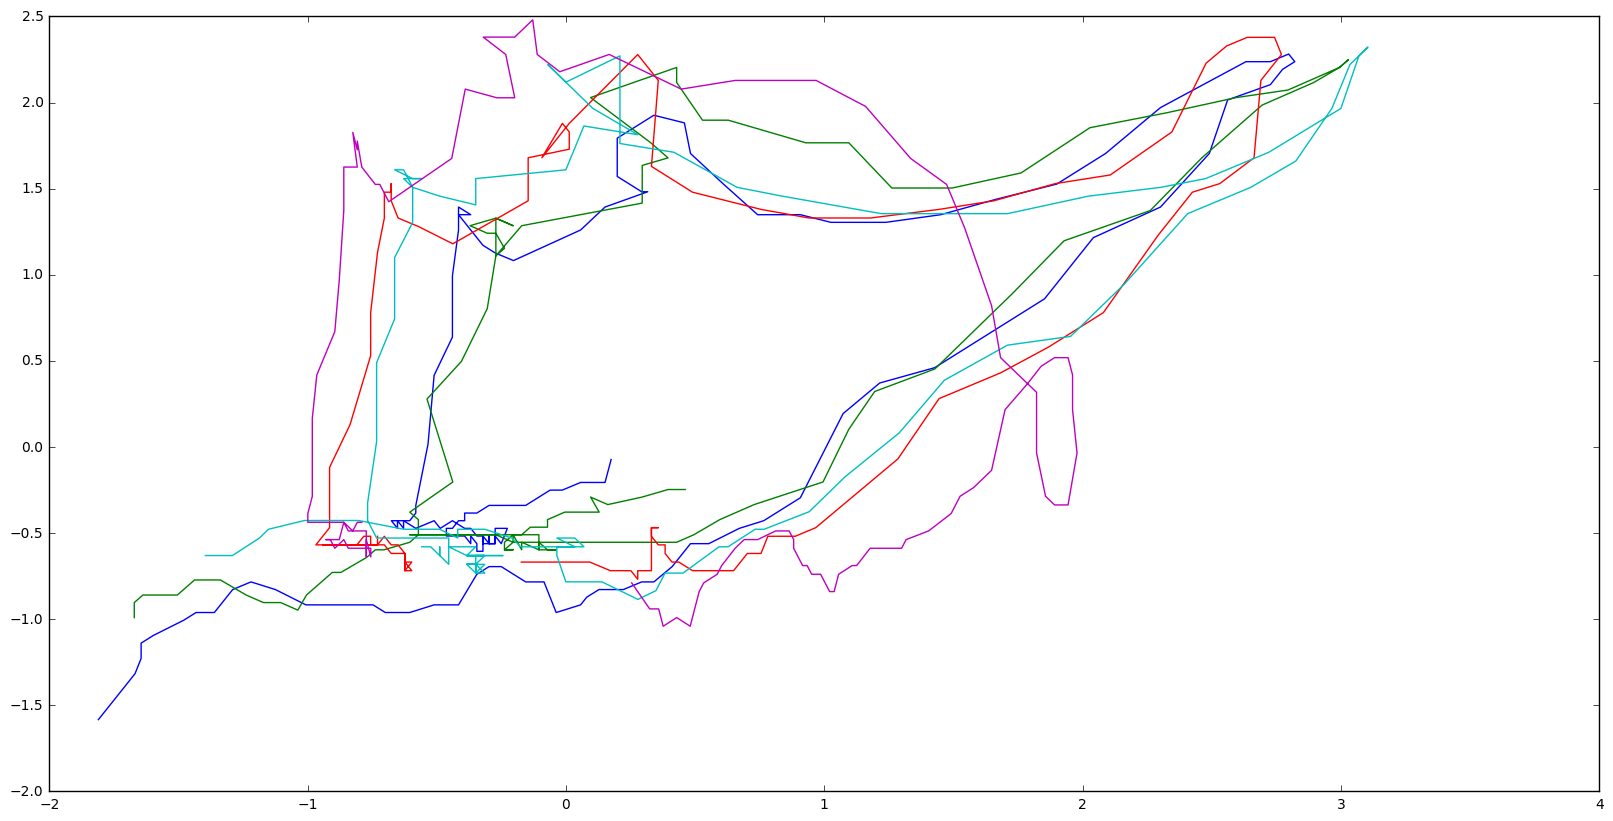

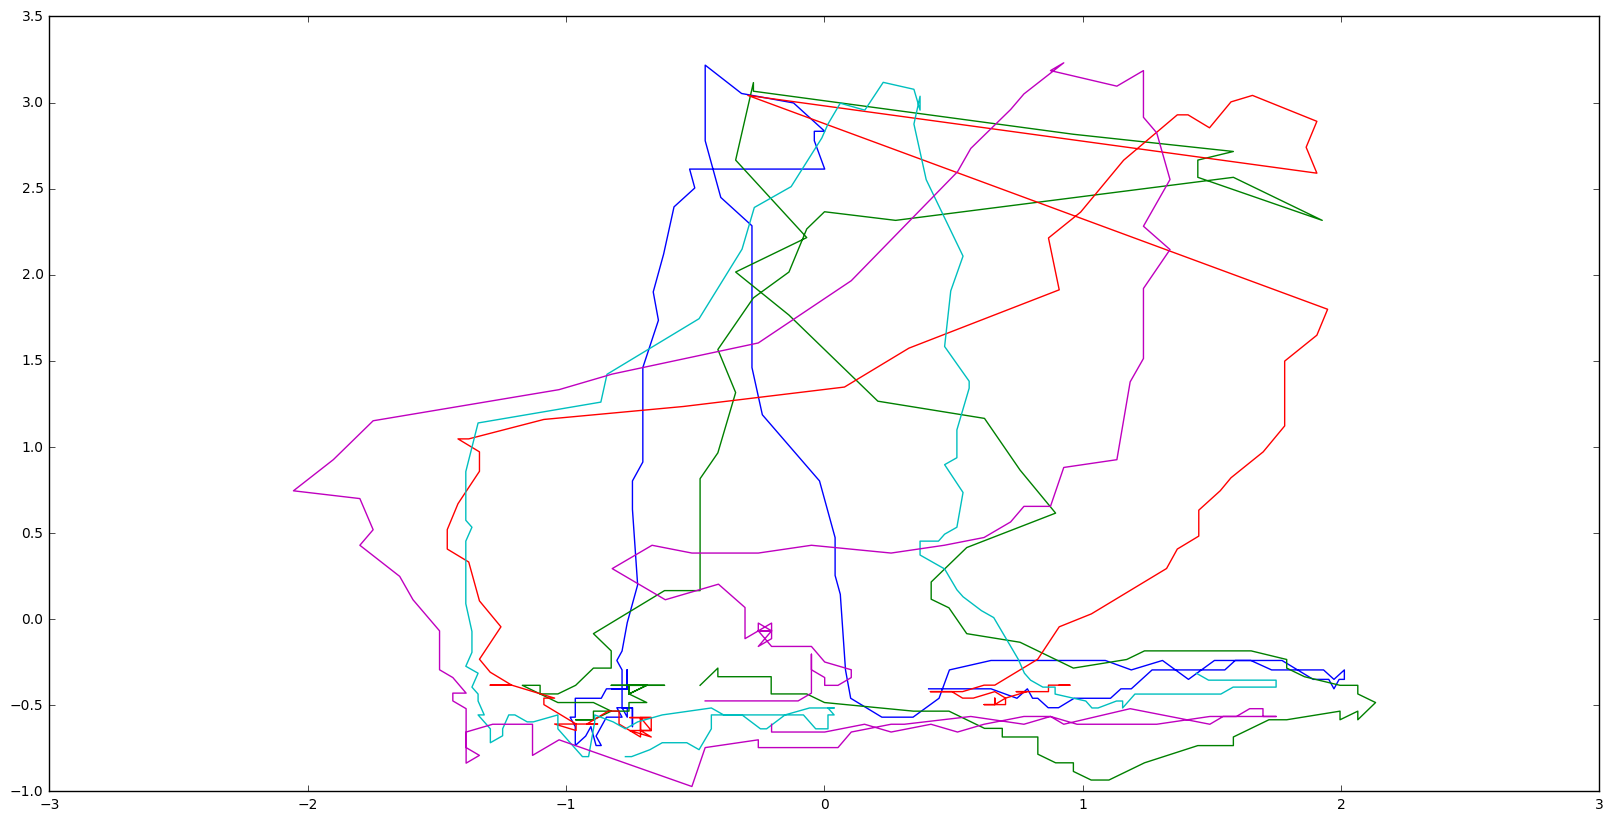

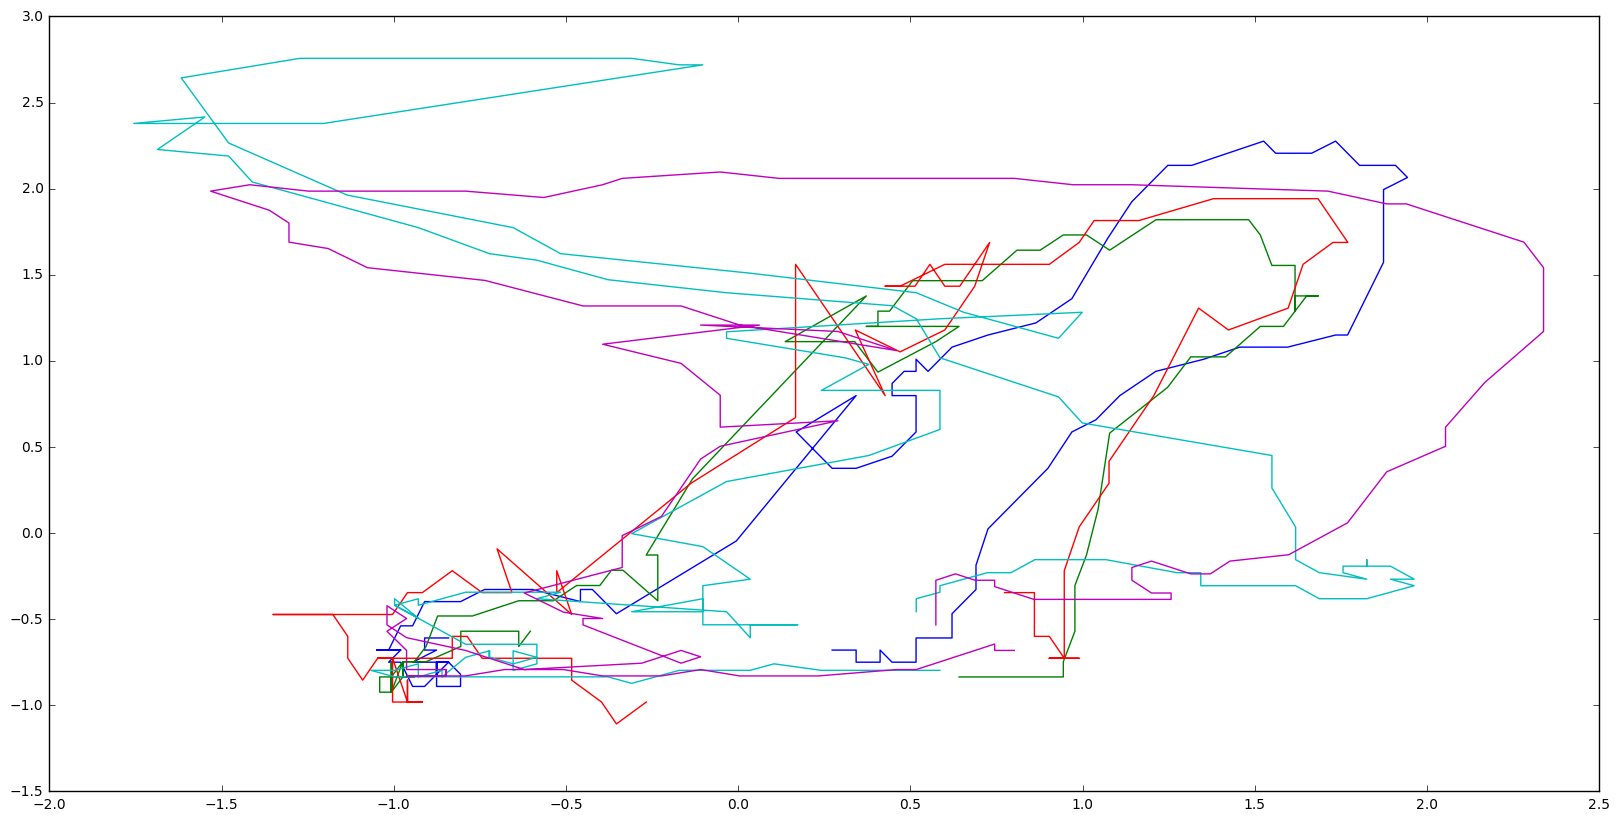

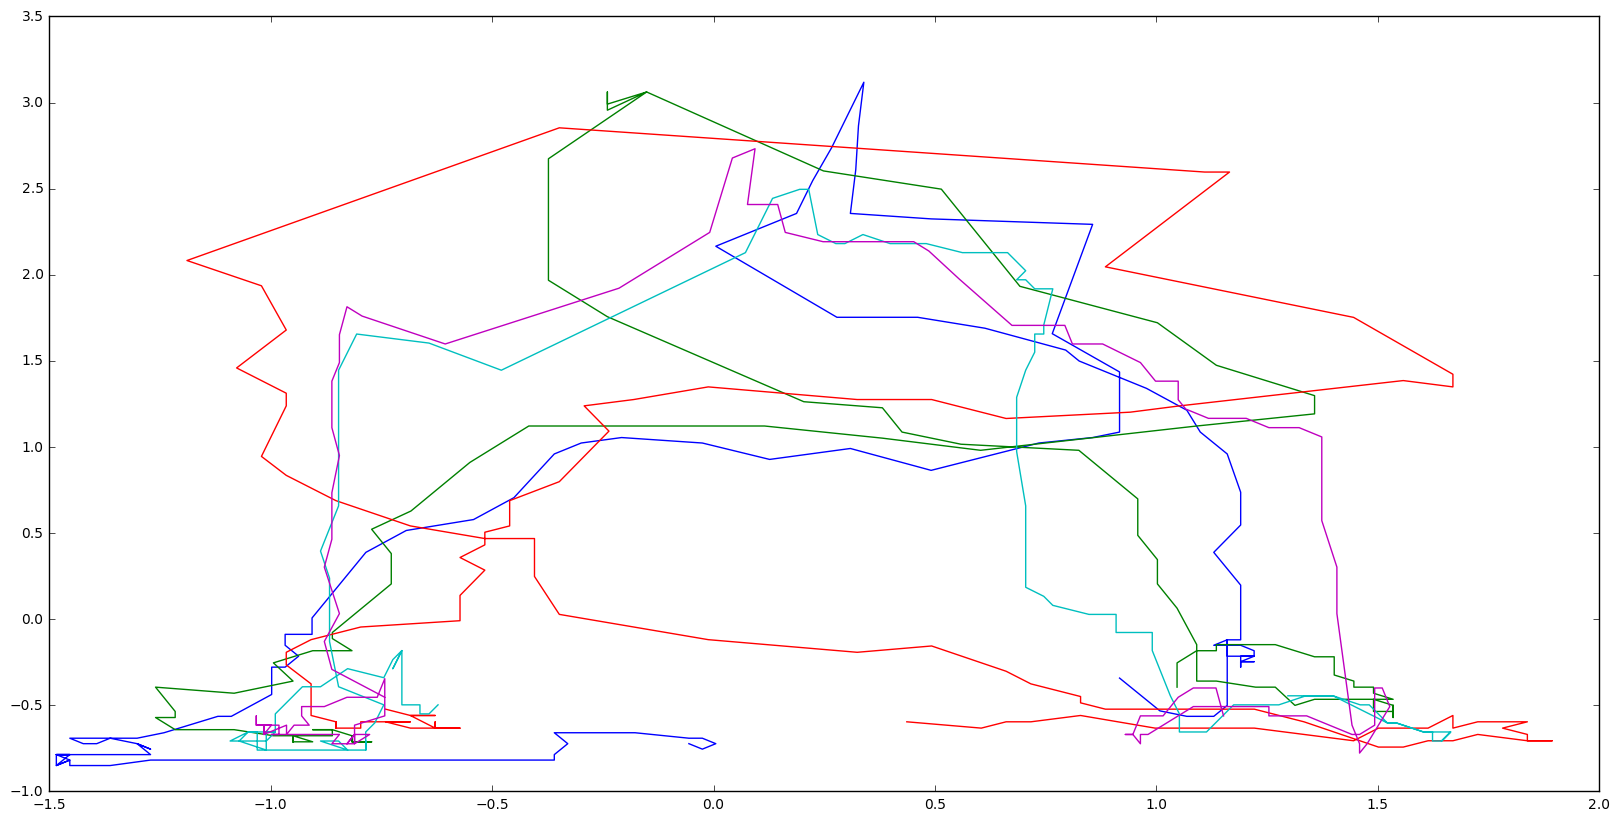

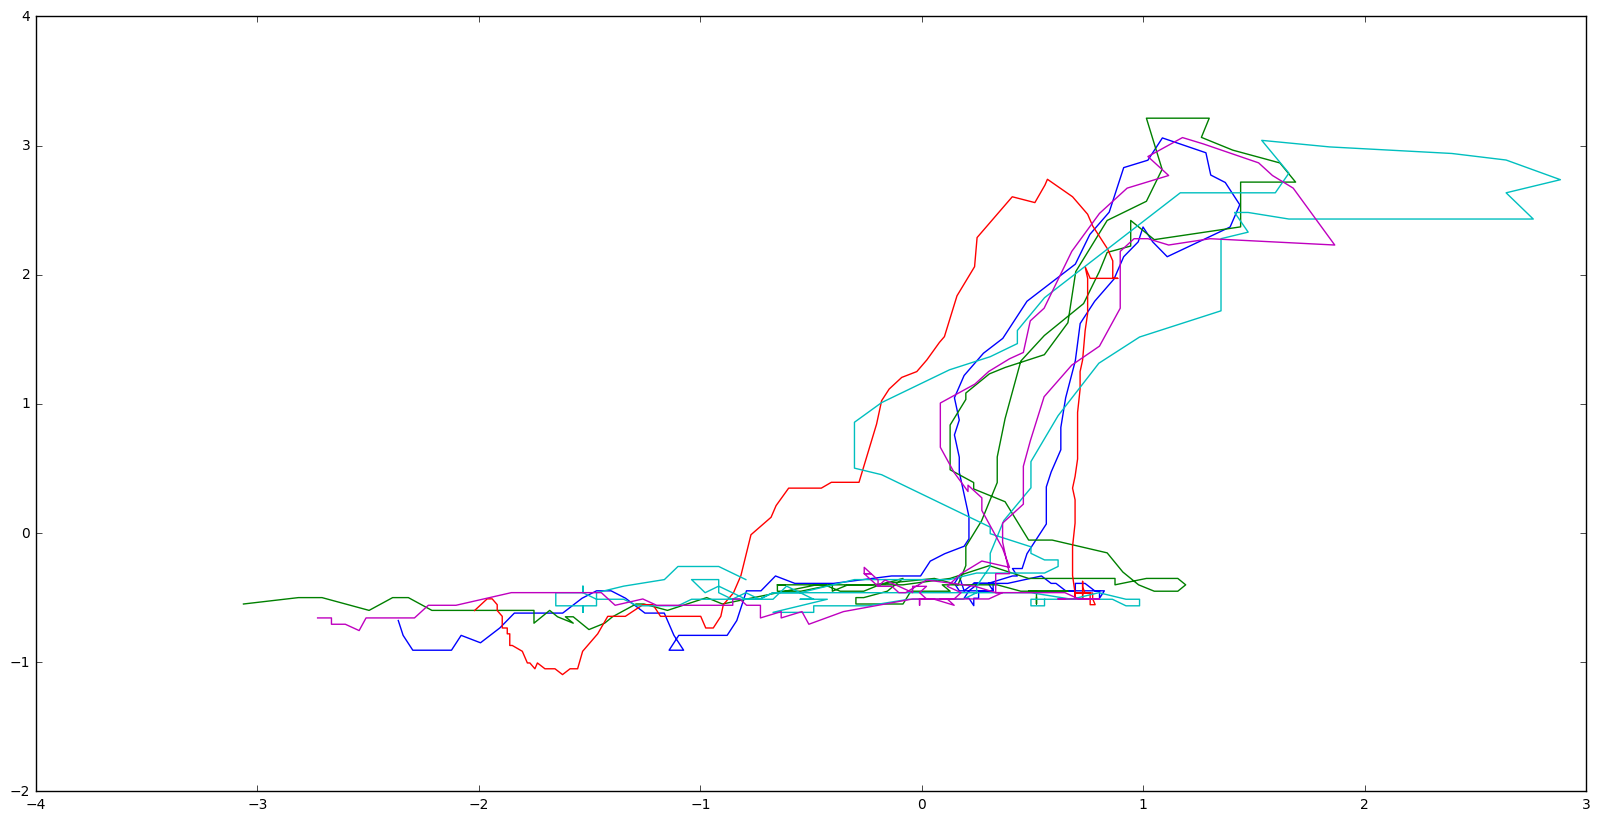

In [36]:
joints=["Right shoulder", "Left shoulder", "Right elbow", "Right wrist","Left elbow", "Left wrist",
        "Right hip", "Right knee", "Right ankle", "Left hip", "Left knee", "Left ankle", "Neck ", 
        "Right eye", "Right ear","Left eye", "Left ear"]
#aligned = Tools.align_frames(data, pre.get_release_frame(60, 120), 60, 40)
aligned = Tools.normalize(data)
ALIGNING = True
ERRORBAR = False
JOINT = 0
NR_JOINTS = 12
nr_examples = 5 #len(data) # 100
cutoff_example_nr = 30


print("JOINT: ", JOINT)
for j in range(len(index_liste)):
    stds = 0
    #print(index_liste[j][0])
    #print(index_liste[j][0][len(index_liste[j][0])//2:len(index_liste[j][0])//2+nr_examples])
    # nr_examples = len(index_liste[j][0])    #100
    index = index_liste[j][0][:nr_examples]
    #index2 = index_liste[j][0][len(index_liste[j][0])//2:len(index_liste[j][0])//2+nr_examples]
    if ALIGNING:
        frame = aligned[index]
    #    frame2 = aligned[index2]
    else:
        frame = data[index]
    #    frame2 = new_data[index2]
    plt.figure(figsize=(20,10))
    x = frame[:, :, JOINT,1]
    y = frame[:, :,JOINT,0]
    #x2 = frame2[:, :, JOINT,1]
    #y2 = frame2[:, :,JOINT,0]
    for k, exa in enumerate(x):
        #if sum(abs(exa-meX))< np.median(error) and nr<cutoff_example_nr:
        plt.plot(exa, y[k])
    #    plt.plot(x2[k], y2[k], c = "red")
    #plt.ylim(-3, 3)
    #plt.xlim(-3, 3)
    #plt.legend()
    plt.show()

# Release frame

In [40]:
from data_preprocess import Preprocessor
prepro = Preprocessor("cf_data.csv")
rel = prepro.get_release_frame(60, 120)

/Users/ninawiedemann/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (253,254,255,256,257,258,259,289) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


csv eingelesen with length  13150
Only Pitcher rows


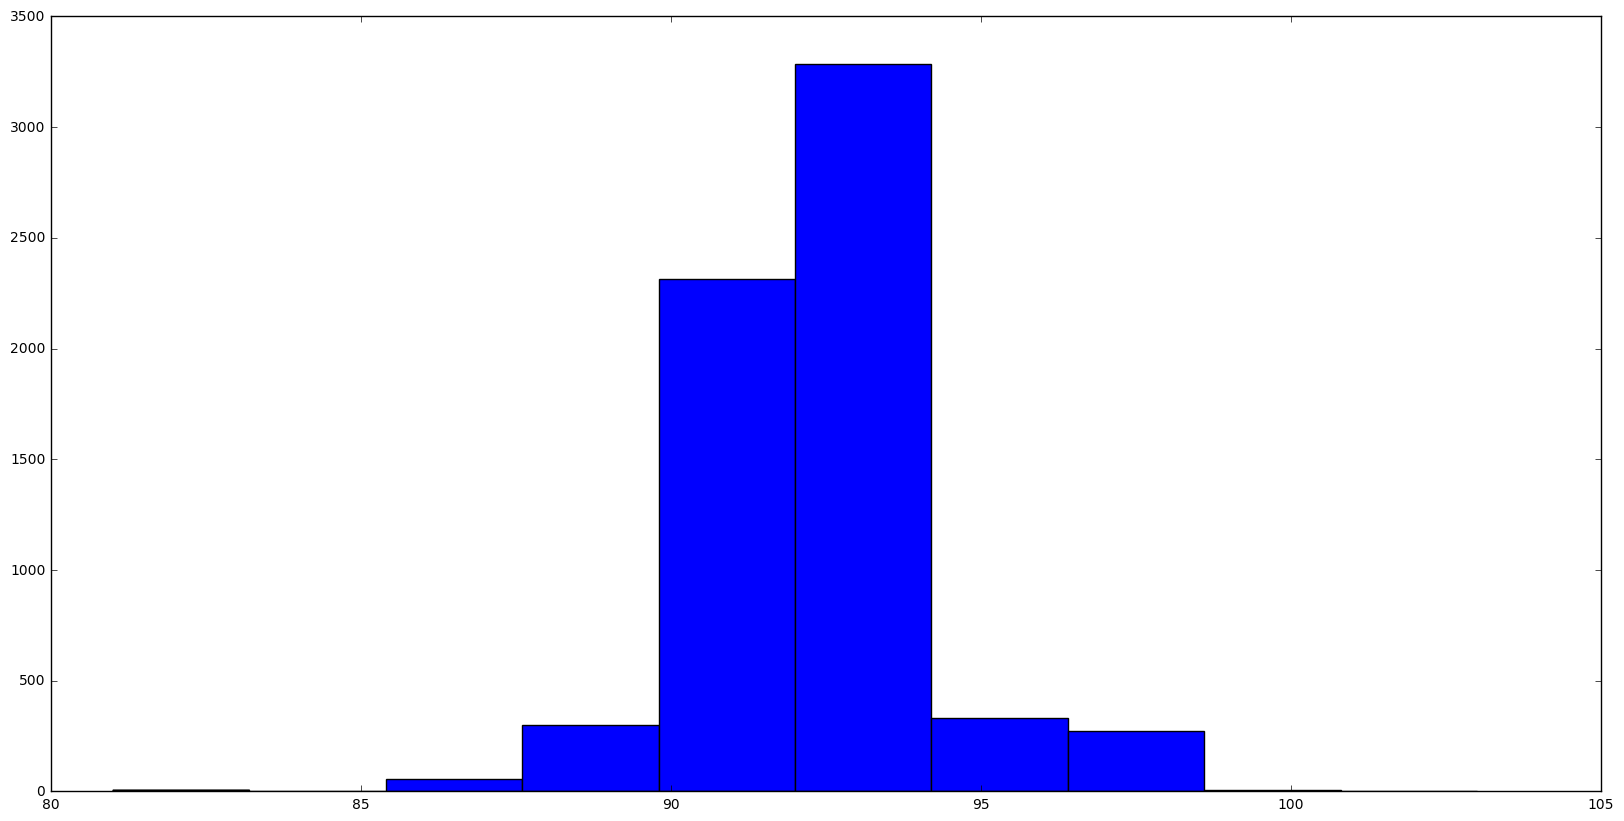

In [43]:
plt.figure(figsize = (20,10))
plt.hist(rel)
plt.show()

In [45]:
print(np.bincount(np.asarray(rel, dtype = int)))

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    2    1    3    0    3    6   48   91  210
  459 1856 1366 1172  746  255   75  259   13    3    4    0    2    1]


In [72]:
arr = ["2017-05-20", "2017-05-24", "2017-06-07",
 "2017-06-11", "2017-06-19", "2017-06-23", "2017-07-05", "2017-07-17", "2017-04-15", "2017-04-19", "2017-05-03", "2017-05-07","2017-04-14", "2017-04-18",
  "2017-05-02", "2017-05-06", "2017-05-19", "2017-05-23", "2017-06-06", "2017-06-10", "2017-06-18", "2017-06-22", "2017-07-04", "2017-07-16"]
print(len(arr))
print(len(np.unique(arr)))

24
24


In [ ]:
pos = np.load("/Users/ninawiedemann/Desktop/UNI/Praktikum/numpy arrays/all_frames.npy")
pos = np.reshape(pos, (30,55,55))
print(pos.shape)
i=0
for pic in pos:
    print(i)
    i+=1
    plt.imshow(pic)
    plt.gray()
    plt.show()

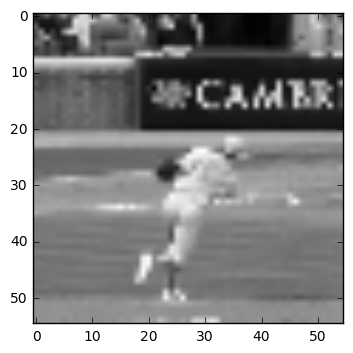

In [99]:
pos = np.load("/Users/ninawiedemann/Desktop/UNI/Praktikum/numpy arrays/predicted_frame.npy")
pos = np.reshape(pos, (55,55))
plt.imshow(pos)
plt.gray()
plt.show()

## JSON file handling

In [103]:
import codecs
import json
obj_text = codecs.open("/Users/ninawiedemann/Desktop/UNI/Praktikum/ALL/Pose_Estimation/out_joints/490555-88fa9ebc-01eb-448d-b60b-8826dbe6b8b9_joints.json", encoding='utf-8').read()
b_new = json.loads(obj_text)
pitcher_array = np.array(b_new)[:,:12,:]
print(pitcher_array.shape)


(167, 12, 2)


# First movement frame

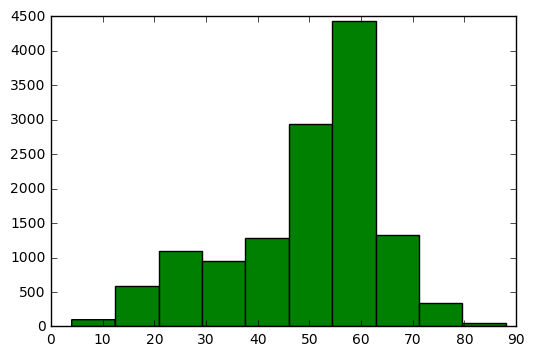

[ -6.60000000e+01  -6.20000000e+01  -5.20000000e+01  -5.10000000e+01
  -4.70000000e+01  -4.30000000e+01  -4.20000000e+01  -7.00000000e+00
   4.00000000e+00   5.00000000e+00   6.00000000e+00   7.00000000e+00
   8.00000000e+00   9.00000000e+00   1.00000000e+01   1.10000000e+01
   1.20000000e+01   1.30000000e+01   1.40000000e+01   1.50000000e+01
   1.60000000e+01   1.70000000e+01   1.80000000e+01   1.90000000e+01
   2.00000000e+01   2.10000000e+01   2.20000000e+01   2.30000000e+01
   2.40000000e+01   2.50000000e+01   2.60000000e+01   2.70000000e+01
   2.80000000e+01   2.90000000e+01   3.00000000e+01   3.10000000e+01
   3.20000000e+01   3.30000000e+01   3.40000000e+01   3.50000000e+01
   3.60000000e+01   3.70000000e+01   3.80000000e+01   3.90000000e+01
   4.00000000e+01   4.10000000e+01   4.20000000e+01   4.30000000e+01
   4.40000000e+01   4.50000000e+01   4.60000000e+01   4.70000000e+01
   4.80000000e+01   4.90000000e+01   5.00000000e+01   5.10000000e+01
   5.20000000e+01   5.30000000e+01

In [57]:
import matplotlib.pylab as plt
#plt.hist(cf['first_movement_frame_index'].values)
new = []
for i in cf['first_movement_frame_index'].values:
    if not np.isnan(i) and i>0 and i<100:
        new.append(i)
plt.hist(new)
plt.show()
print(np.unique(cf['first_movement_frame_index'].values))

In [ ]:
pos = np.load("/Users/ninawiedemann/Desktop/UNI/Praktikum/numpy arrays/positive.npy")
# pos = np.reshape(pos, (55,55))
print(pos.shape)
for pic in pos:
    plt.imshow(pic)
    plt.gray()
    plt.show()

In [ ]:
vid_path = "/Volumes/Nina Backup/videos/atl/2017-05-07/center field/490570-0044dbdd-6368-4610-9372-03b90ad3715c.mp4"
#vid_path =  "/Users/ninawiedemann/Desktop/UNI/Praktikum/491122-f57ef71a-f2e2-453b-9e56-40c7d9ff2b4a.mp4"
#491122-fbbd3902-eae8-48dc-bec1-fbba7a3b581d.mp4" #491122-fbf1187f-8bcd-4ced-b28b-3132c5635f65.mp4"

KERNEL_SIZE = 15
DIFF = 2
FACTOR = 4
FAC2 = 1/10
video_capture = cv2.VideoCapture(vid_path)
diffs = []
for i in open(vid_path+".dat").readlines():
    datContent=ast.literal_eval(i)
bottom_p=datContent['Pitcher']['bottom']
left_p=datContent['Pitcher']['left']+80
right_p=datContent['Pitcher']['right']-80
top_p=datContent['Pitcher']['top'] #+130
frames = np.zeros((167, bottom_p-top_p, right_p-left_p))
nr_pix = frames.shape[1]*frames.shape[2]
i = 0
plt.figure()
while i<90:
    
    ret, frame = video_capture.read()
    if frame is None:
        break
    pitcher = frame[top_p:bottom_p, left_p:right_p]
    # print(pitcher.shape)
    pitcher = np.mean(pitcher, axis = 2)
    pitcher = cv2.GaussianBlur(pitcher,(KERNEL_SIZE,KERNEL_SIZE),0)
    frames[i]= pitcher
    if i > 50:
        print(i)
        mean_diff = np.mean(diffs)
        print(mean_diff)
        diff = np.mean(np.absolute(pitcher-frames[i-1]))
        higher5 = np.sum(np.absolute(pitcher-frames[i-1])>5)
        print(higher5, nr_pix)
        diffs.append(diff)
        print(diff)
        if np.sum(higher5)>FAC2*nr_pix: #diff> FACTOR* mean_diff: #DIFF:
            print("HERE")
        plt.subplot(121)
        plt.imshow(pitcher)
        plt.subplot(122)
        plt.imshow(np.absolute(pitcher-frames[i-1]))
        plt.gray()
        plt.show()
    i+=1

In [ ]:
from os import listdir
KERNEL_SIZE = 15
DIFF = 2
path = "/Volumes/Nina Backup/videos/atl/2017-05-07/center field/"

list_files = listdir(path)
start_frame = []

for f in list_files[10:]:
    mean_diff = 0
    diffs = []
    if f[-4:]==".mp4":
        print("---------------------------NEW VIDEO-----------------------------")
        print(f)
        video_capture = cv2.VideoCapture(path+f)
        for i in open(path+f+".dat").readlines():
            datContent=ast.literal_eval(i)
        bottom_p=datContent['Pitcher']['bottom']
        left_p=datContent['Pitcher']['left']+80
        right_p=datContent['Pitcher']['right']-80
        top_p=datContent['Pitcher']['top']+130
        frames = np.zeros((167, bottom_p-top_p, right_p-left_p))
        nr_pix = frames.shape[1]*frames.shape[2]
        i = 0
        found = False
        #plt.figure()
        while i<80:
            ret, frame = video_capture.read()
            if frame is None:
                break
            pitcher = frame[top_p:bottom_p, left_p:right_p]
            # print(pitcher.shape)
            pitcher = np.mean(pitcher, axis = 2)
            pitcher = cv2.GaussianBlur(pitcher,(KERNEL_SIZE,KERNEL_SIZE),0)
            frames[i]= pitcher
            if i==20 and not found:
                mean_diff = np.mean(diffs)
                print("mean_diff:", mean_diff)
            if i > 0:
                diff = np.mean(np.absolute(pitcher-frames[i-1]))
                higher5 = np.sum(np.absolute(pitcher-frames[i-1])>5)
                diffs.append(diff)
                #print(diff)
                if i>20 and np.sum(higher5)>FAC2*nr_pix and not found: # diff> 5*mean_diff
                        start_frame.append(i)
                        found = True
                        print("found", i)
                        print(diff)
                        plt.subplot(121)
                        plt.imshow(pitcher)
                        plt.subplot(122)
                        plt.imshow(np.absolute(pitcher-frames[i-1]))
                        plt.gray()
                        plt.show()
                if found:
                    plt.subplot(121)
                    plt.imshow(pitcher)
                    plt.subplot(122)
                    plt.imshow(np.absolute(pitcher-frames[i-1]))
                    plt.gray()
                    plt.show()
                    if i>start_frame[-1]+4:
                        print(i, start_frame[-1])
                        break
            i+=1

# Evaluation of first movement detection:

Parameters:
* bounding box: smaller, only around leg
* Gaussian blur kernel size: 15 (try smaller/bigger ones)
* DIFF: threshold of difference in this area: mean / nonzero


Results:
* 491122-fbbd3902-eae8-48dc-bec1-fbba7a3b581d.mp4: moves before the pitch, but too slow so my version works fine
* 491122-fbf1187f-8bcd-4ced-b28b-3132c5635f65.mp4: first one tested, works
* In general works fine, but some outliers that just don't reach the threshold level

Outliers:
* idea: first movement if k times the moving average
* count nonzero: -: speed not taken into account, +: not dependent on outliers/mean

In [ ]:
from os import listdir
KERNEL_SIZE = 15
DIFF = 2
path = "/Volumes/Nina Backup/videos/atl/2017-05-07/center field/"

list_files = listdir(path)
start_frame = []
fi = []

for f in list_files[10:]:
    mean_diff = 0
    diffs = []
    if f[-4:]==".mp4":
        print("---------------------------NEW VIDEO-----------------------------")
        print(f)
        fi.append(f)
        video_capture = cv2.VideoCapture(path+f)
        for i in open(path+f+".dat").readlines():
            datContent=ast.literal_eval(i)
        bottom_p=datContent['Pitcher']['bottom']
        left_p=datContent['Pitcher']['left']+80
        right_p=datContent['Pitcher']['right']-80
        top_p=datContent['Pitcher']['top']+130
        frames = np.zeros((167, bottom_p-top_p, right_p-left_p))
        nr_pix = frames.shape[1]*frames.shape[2]
        i = 0
        found = False
        #plt.figure()
        while True:
            ret, frame = video_capture.read()
            if frame is None:
                if not found:
                    start_frame.append(i)
                break
            pitcher = frame[top_p:bottom_p, left_p:right_p]
            # print(pitcher.shape)
            pitcher = np.mean(pitcher, axis = 2)
            pitcher = cv2.GaussianBlur(pitcher,(KERNEL_SIZE,KERNEL_SIZE),0)
            frames[i]= pitcher
            if i==20 and not found:
                mean_diff = np.mean(diffs)
                print("mean_diff:", mean_diff)
            if i > 0:
                diff = np.mean(np.absolute(pitcher-frames[i-1]))
                higher5 = np.sum(np.absolute(pitcher-frames[i-1])>5)
                diffs.append(diff)
                #print(diff)
                if i>20 and np.sum(higher5)>FAC2*nr_pix and not found: # diff> 5*mean_diff
                        start_frame.append(i)
                        found = True
            i+=1
print(len(fi), len(start_frame))

In [80]:
np.save("/Users/ninawiedemann/Desktop/UNI/Praktikum/numpy arrays/files_used.npy", fi)
np.save("/Users/ninawiedemann/Desktop/UNI/Praktikum/numpy arrays/first_movement_frame.npy", start_frame)

### Test in comparison to real label

/Users/ninawiedemann/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (253,254,255,256,257,258,259,289) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


file 490570-08a4c347-a1c5-4ae9-941b-746c41be75d1.mp4 myframe 61 label 57.0
file 490570-0bb695ff-260b-4661-a9e5-73217cbb96e5.mp4 myframe 63 label 57.0
file 490570-0c746c8e-b321-493b-85f6-b23b384b21a2.mp4 myframe 78 label 60.0
label 65 60.0


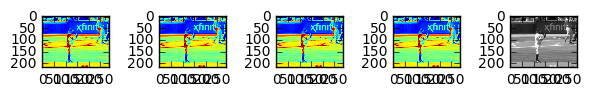

my frame 83 78


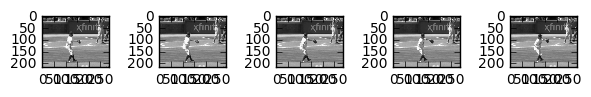

file 490570-0cc8c64c-29f6-41f7-aaa1-05f16252f14d.mp4 myframe 51 label 49.0
file 490570-0fad529c-f23e-404d-9f59-ea156cca547b.mp4 myframe 62 label 56.0
file 490570-12f10d47-ff20-4e61-a304-c08e778840a8.mp4 myframe 72 label 53.0
label 58 53.0


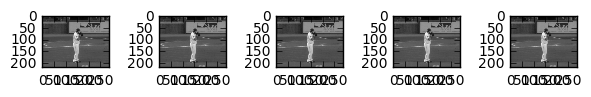

my frame 77 72


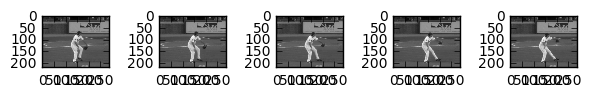

file 490570-13ac42ef-d384-421a-824e-8e45bda0447a.mp4 myframe 76 label 53.0
label 58 53.0


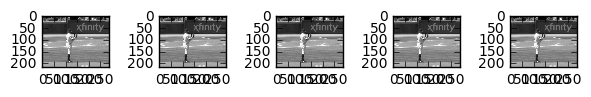

my frame 81 76


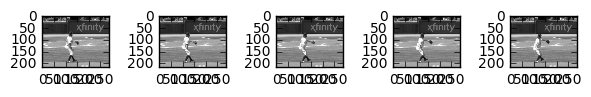

file 490570-150e1d19-abf5-41ca-afc0-e019dfb26b81.mp4 myframe 57 label 51.0
file 490570-153c02e0-ccda-44a1-8f08-8904347bd53e.mp4 myframe 65 label 56.0
label 61 56.0


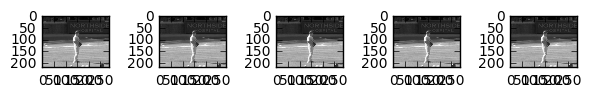

my frame 70 65


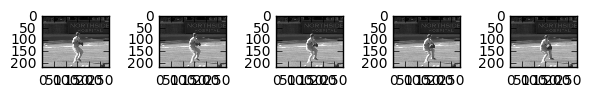

file 490570-155dca18-412c-4d52-b120-b698110d3862.mp4 myframe 59 label 41.0
label 46 41.0


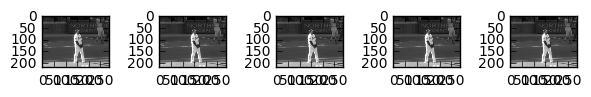

my frame 64 59


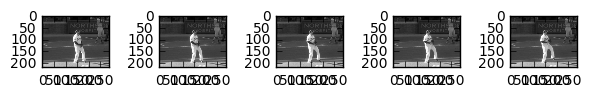

In [14]:
fi = np.load("/Users/ninawiedemann/Desktop/UNI/Praktikum/numpy arrays/files_used.npy")
start_frame = np.load("/Users/ninawiedemann/Desktop/UNI/Praktikum/numpy arrays/first_movement_frame.npy")
path = "/Volumes/Nina Backup/videos/atl/2017-05-07/center field/"
nr_shown = 6
cf = pd.read_csv("cf_data.csv")
cf = cf[cf["Player"]=="Pitcher"]
games = cf["Game"].values.tolist()
labels = cf["first_movement_frame_index"].values
for i, filename in enumerate(fi[:10]):
    game = filename[:-4]
    ind = games.index(game)
    lab = labels[ind]
    print("file", fi[i], "myframe", start_frame[i], "label", lab)
    if abs(lab-start_frame[i])>nr_shown:
        video_capture = cv2.VideoCapture(path+filename)
        for l in open(path+filename+".dat").readlines():
            datContent=ast.literal_eval(l)
        bottom_p=datContent['Pitcher']['bottom']
        left_p=datContent['Pitcher']['left']
        right_p=datContent['Pitcher']['right']
        top_p=datContent['Pitcher']['top']
        frames = np.zeros((167, bottom_p-top_p, right_p-left_p))
        j = 0
        while j<start_frame[i]+nr_shown or j<lab+nr_shown:
            ret, frame = video_capture.read()
            if frame is None:
                break
            pitcher = frame[top_p:bottom_p, left_p:right_p]
            frames[j] = np.mean(pitcher, axis = 2)
            #print(j, start_frame[i], lab)
            if j==start_frame[i]+nr_shown-1:
                print("my frame", j, start_frame[i])
                plt.subplot(151)
                plt.imshow(frames[j-4])
                plt.subplot(152)
                plt.imshow(frames[j-3])
                plt.subplot(153)
                plt.imshow(frames[j-2])
                plt.subplot(154)
                plt.imshow(frames[j-1])
                plt.subplot(155)
                plt.imshow(frames[j])
                plt.gray()
                plt.tight_layout()
                plt.show()
            if j== lab+nr_shown-1:
                print("label", j, lab)
                plt.subplot(151)
                plt.imshow(frames[j-4])
                plt.subplot(152)
                plt.imshow(frames[j-3])
                plt.subplot(153)
                plt.imshow(frames[j-2])
                plt.subplot(154)
                plt.imshow(frames[j-1])
                plt.subplot(155)
                plt.imshow(frames[j])
                plt.gray()
                plt.tight_layout()
                plt.show()
            j+=1

In [4]:
videos = np.load("/Users/ninawiedemann/Desktop/UNI/Praktikum/numpy arrays/array_videos_2017-05-07.npy")
first_move = np.load("/Users/ninawiedemann/Desktop/UNI/Praktikum/numpy arrays/label_firstMove_2017-05-07.npy")